In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

In [4]:
import matplotlib as mpl
import matplotlib.font_manager as fm
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')

## [체질검사]
#### 체질 비만도를 예측하기 위한 그래디언트 부스팅 분석을 실시하고 결과를 해석하시오.
### 1. 데이터 구성하기

In [5]:
df_raw = pd.read_csv('/home/pirl/Downloads/data2_py/체질검사.csv')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [7]:
#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT',axis=1,inplace=False)

#데이터 분할 (train:test = 7:3)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,
                                                            test_size=0.3)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


### 2. 모델 생성하기

In [8]:
#기본 옵션으로 트리 생성
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x,df_train_y)

#train 데이터의 설명력
print('Score on training set:{:.3f}'.format(gb_uncustomized.score(df_train_x,df_train_y)))

#test 데이터의 설명력
print('Score on test set:{:.3f}'.format(gb_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.981
Score on test set:0.722


In [10]:
##n-estimators : 트리 수 변경에 따른 모델 성능

#train , test 설명력 결과 저장
train_score=[]; test_score=[]
para_n_tree=[n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingRegressor(n_estimators=v_n_estimators, random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

#결과 저장
df_score_n = pd.DataFrame()
df_score_n['n_estimators']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['TestScore']=test_score

In [11]:
#모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.696,0.570
1,20,0.835,0.684
2,30,0.891,0.708
3,40,0.921,0.710
4,50,0.939,0.713
5,60,0.953,0.714
6,70,0.962,0.718
7,80,0.970,0.718
8,90,0.976,0.720
9,100,0.981,0.722


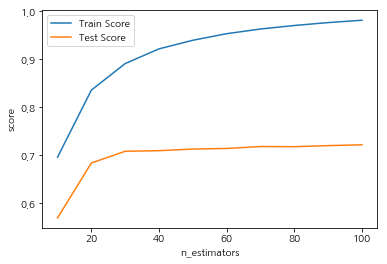

In [12]:
#모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle='-', label='Train Score')
plt.plot(para_n_tree, test_score, linestyle='-', label='Test Score')
plt.ylabel('score');plt.xlabel('n_estimators')
plt.legend()

트리 수 증가에 따라 모델의 설명력은 지속적으로 향상되고 있으나 test의 성능 변화를 고려하여 30 선택

In [13]:
##min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 다른 모델 성능

#train, test의 설명력 결과 저장
train_score=[];test_score=[]

#min_samples_leaf : 잎사귀 최소 자료 수
para_leaf =[n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234,n_estimators=30,
                                min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

#데이터 테이블로 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [14]:
#모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.891,0.708
1,2,0.885,0.711
2,3,0.882,0.720
3,4,0.880,0.706
4,5,0.875,0.713
5,6,0.875,0.722
6,7,0.874,0.724
7,8,0.865,0.736
8,9,0.862,0.744
9,10,0.856,0.730


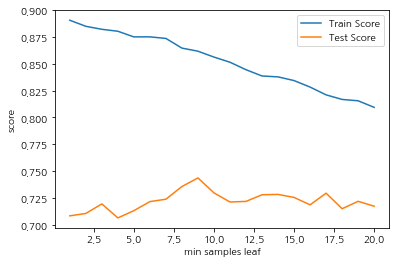

In [15]:
#모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle='-', label='Test Score')
plt.ylabel('score');plt.xlabel('min samples leaf')
plt.legend()

잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소하며 test데이터의 성능 변화를 고려하여 9 선택 

In [20]:
##min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능

#train, test의 설명력 결과 저장
train_score=[];test_score=[]

#min_samples_split : 분할하기 위한 노드의 최소 자료 수
para_split =[n_split * 2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234,n_estimators=30, min_samples_leaf = 9,
                                min_samples_split=v_min_samples_split)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

#데이터 테이블로 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesLeaf'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [21]:
#모델 설명력 확인
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.862,0.744
1,4,0.862,0.744
2,6,0.862,0.744
3,8,0.862,0.744
4,10,0.862,0.744
5,12,0.862,0.744
6,14,0.862,0.744
7,16,0.862,0.744
8,18,0.862,0.744
9,20,0.861,0.744


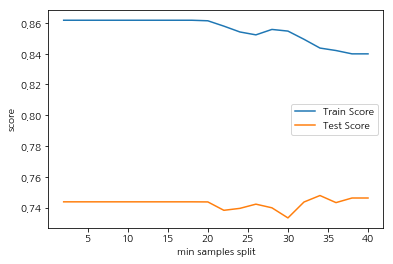

In [22]:
#모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle='-', label='Train Score')
plt.plot(para_split, test_score, linestyle='-', label='Test Score')
plt.ylabel('score');plt.xlabel('min samples split')
plt.legend()

분리 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소하며 train/test데이터의 성능변화를 고려하여 20 선택

In [24]:
##max_depth : 최대 깊이 변경에 따른 모델 성능

#train, test의 설명력 결과 저장
train_score=[];test_score=[]

#max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234,n_estimators=30,
                                min_samples_leaf=9, min_samples_split=20,
                                max_depth = v_max_depth)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

#데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesLeaf'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [25]:
#모델 설명력 확인
df_score_depth.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.674,0.661
1,2,0.776,0.716
2,3,0.861,0.744
3,4,0.909,0.715
4,5,0.919,0.712
5,6,0.928,0.714
6,7,0.931,0.719
7,8,0.935,0.715
8,9,0.934,0.719
9,10,0.937,0.726


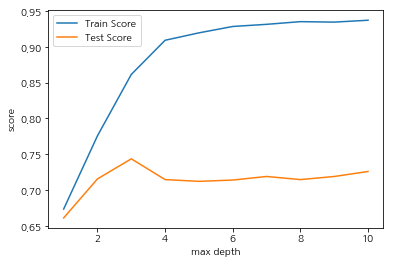

In [26]:
#모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle='-', label='Test Score')
plt.ylabel('score'); plt.xlabel('max depth')
plt.legend()

최대 깊이 증가에 따라 모델의 설명력은 증가하며 test 데이터의 성능 변화를 고려하여 3 선택

In [36]:
##learning_rate : 학습률 변경에 따른 모델 성능

#train 및 test 설명력 결과 저장
train_score=[]; test_score=[]

#learning rate : 학습률 변경 0.1~0.9
para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb=GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=9,
                                 min_samples_split=20, max_depth=3,
                                 learning_rate=v_learning_rate)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
#결과 저장
df_score_lr=pd.DataFrame()
df_score_lr['LearningRate']=para_lr
df_score_lr['TrainScore']=train_score
df_score_lr['TestScore']=test_score

In [29]:
#모델 설명력 확인
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.861,0.744
1,0.2,0.934,0.743
2,0.3,0.955,0.717
3,0.4,0.968,0.723
4,0.5,0.980,0.666
5,0.6,0.985,0.638
6,0.7,0.990,0.621
7,0.8,0.991,0.622
8,0.9,0.992,0.554


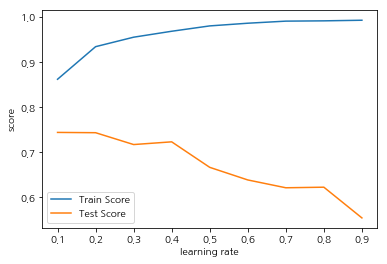

In [30]:
#모델 설명력 그래프 확인
plt.plot(para_lr, train_score, linestyle='-', label='Train Score')
plt.plot(para_lr, test_score, linestyle='-', label='Test Score')
plt.ylabel('score'); plt.xlabel('learning rate')
plt.legend()

학습률 증가에 따라 모델의 설명력은 증가하는데 반면 test데이터의 성능은 급격하게 저하되어 0.2 선택
### 3. 결론 도출

In [35]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=9,
                                    min_samples_split=20, max_depth=3, learning_rate=0.2)
gb_final.fit(df_train_x,df_train_y)

#train데이터 설명력
print('Score on training set:{:.3f}'.format(gb_final.score(df_train_x,df_train_y)))
#test데이터 설명력
print('Score on test set:{:.3f}'.format(gb_final.score(df_test_x,df_test_y)))

Score on training set:0.934
Score on test set:0.743


트리수 30, 잎사귀 노드 최소 자료 수는 9, 분리노드 최소 자료 수는 20, 최대 깊이는 3, 학습률 0.2,

98.1%, 72.2% --> 93.4%, 74.3%

## [실습_당뇨병 발병 원인]
#### 당뇨병 발생을 예측하기 위해 그레디언트 부스팅 분석을 실시하고 결과를 해석하시오.

In [38]:
df_raw = pd.read_csv('/home/pirl/Downloads/data2_py/DIABETES.csv')
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [42]:
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

#선형회귀모형
from sklearn.linear_model import LinearRegression

#변수선택법(후진제거법)
from sklearn.feature_selection import RFE

#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
import seaborn as sns

#회귀분석
from statsmodels.formula.api import ols
#qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot,add_constant
#선형모델
import statsmodels.formula.api as smf
#평가함수
from statsmodels.tools.eval_measures import rmse
#jupyter notebook에서 그래프 자동출력 옵션
%matplotlib inline

In [44]:
#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['Y']
df_raw_x = df_raw.drop('Y',axis=1,inplace=False)

#데이터 분할 (train:test = 7:3)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,
                                                            test_size=0.3)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (309, 10)
train data Y size : (309,)
test data X size : (133, 10)
test data Y size : (133,)


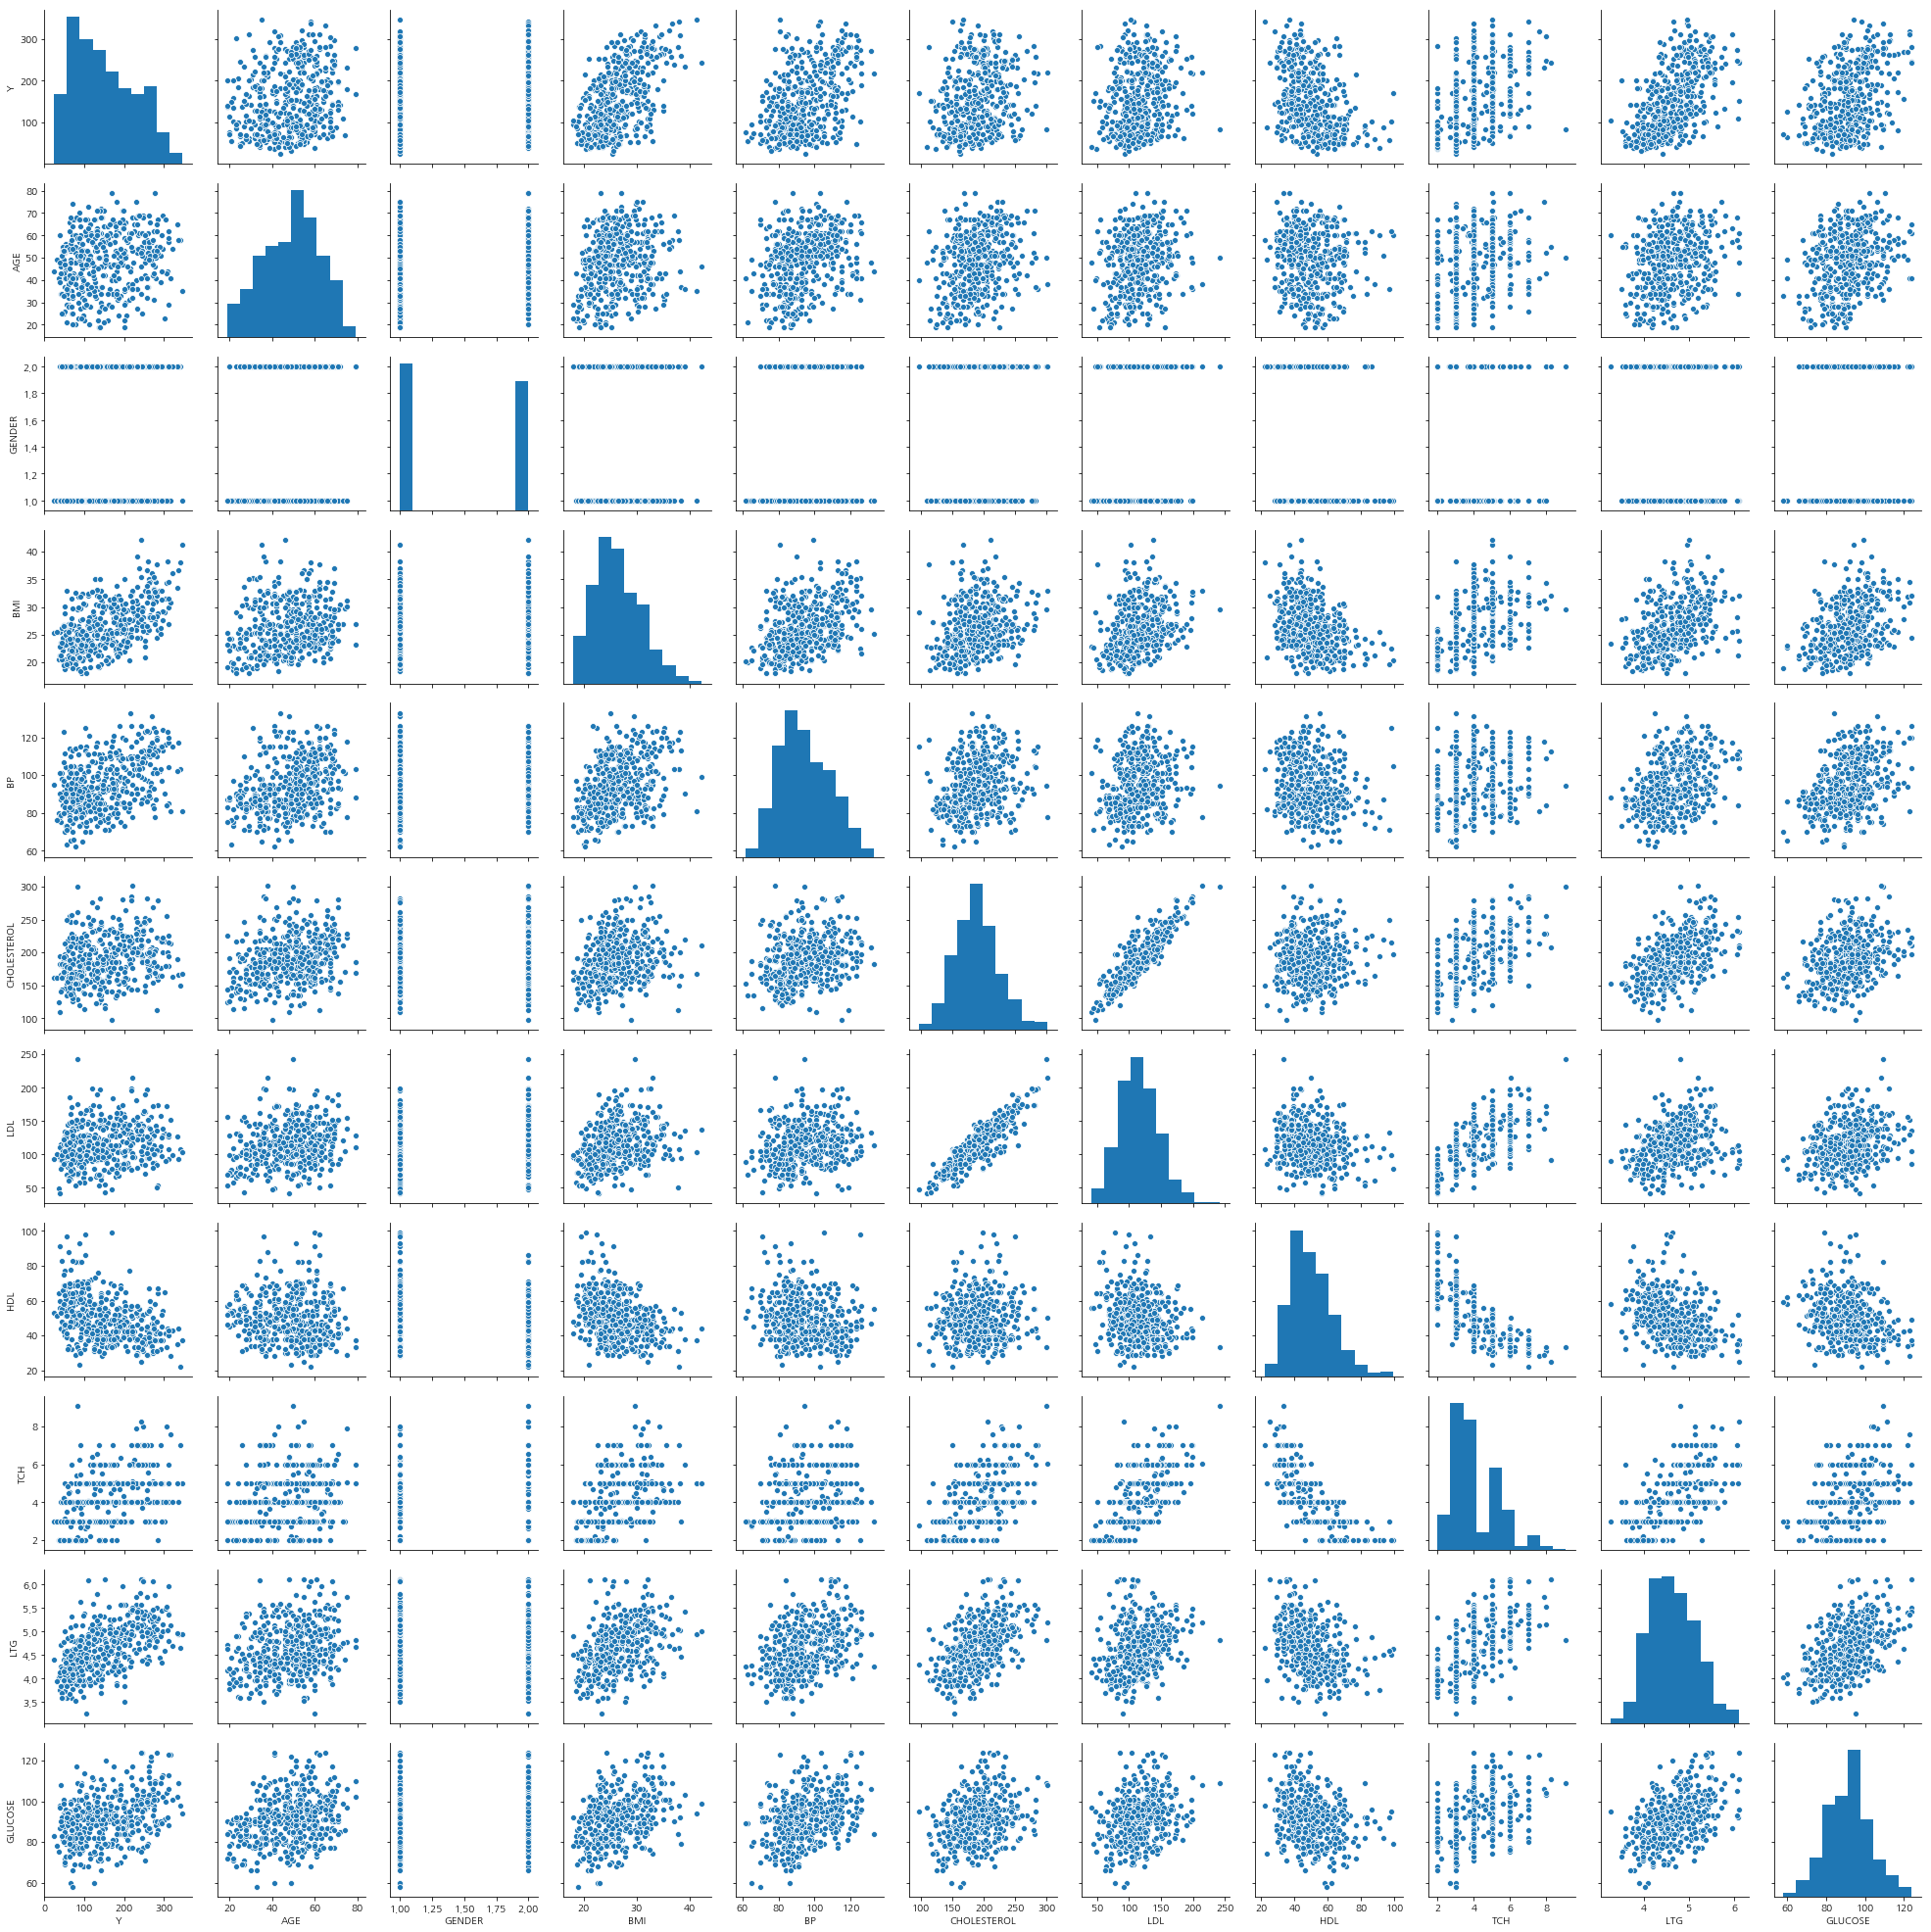

In [46]:
sns.pairplot(df_raw)

In [43]:
#다중공선성 확인

df_raw_x = df_raw.drop('Y', axis=1)

df_raw_x_const = add_constant(df_raw_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values('VIF',inplace=True)
df_vif.round(3)

,variable,VIF
1,AGE,1.217
2,GENDER,1.278
4,BP,1.459
10,GLUCOSE,1.485
3,BMI,1.509
8,TCH,8.891
9,LTG,10.076
7,HDL,15.402
6,LDL,39.193
5,CHOLESTEROL,59.203


In [57]:
#다중공선성 처리

reg_model = smf.ols(formula = 'Y ~ GENDER+BP+GLUCOSE+BMI+LTG+HDL+LDL',data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     65.42
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           5.22e-64
Time:                        10:39:30   Log-Likelihood:                -2388.0
No. Observations:                 442   AIC:                             4792.
Df Residuals:                     434   BIC:                             4825.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -224.0039     36.787     -6.089      0.0

In [172]:
#T 제거 후 공선성 재확인

df_raw_x = df_raw.drop(['Y','AGE','CHOLESTEROL'],axis=1)

df_raw_x_const = add_constant(df_raw_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values('VIF',inplace=True)
df_vif.round(3)

,variable,VIF
1,GENDER,1.262
3,BP,1.405
8,GLUCOSE,1.459
2,BMI,1.502
7,LTG,2.152
4,LDL,2.904
5,HDL,3.730
6,TCH,7.815
0,const,214.949


In [152]:
#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['Y']

#데이터 분할 (train:test = 7:3)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,
                                                            test_size=0.3)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (309, 9)
train data Y size : (309,)
test data X size : (133, 9)
test data Y size : (133,)


In [182]:
#기본 옵션으로 트리 생성
gb_uncustomized = GradientBoostingRegressor()
gb_uncustomized.fit(df_train_x,df_train_y)

#train 데이터의 설명력
print('Score on training set:{:.3f}'.format(gb_uncustomized.score(df_train_x,df_train_y)))

#test 데이터의 설명력
print('Score on test set:{:.3f}'.format(gb_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.844
Score on test set:0.523


to be continued....